# AI-Powered Task Management System - Part 1: EDA & NLP Preprocessing
###  Name: Chandra
###  Date: July 2025

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Natural Language Processing Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
print("All libraries imported successfully!")

[nltk_data] Downloading package punkt to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chandra Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...


All libraries imported successfully!


[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Chandra Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# EXPLORATORY DATA ANALYSIS (EDA) AND DATA CLEANING

In [3]:
df = pd.read_csv('D:\AI TASK MANAGEMENT\Finalised Task Management.csv')

In [4]:
df.head()

,Issue Key,Summary,Description,Assignee,Reporter,Issue Type,Priority,Status,Component,Created,Due Date
0,SWP-1,User Authentication Failure,Users unable to log in due to OAuth 2.0 token ...,Bob,Heidi,Bug,High,In Progress,Authentication,11-06-2025,25-06-2025
1,SWP-2,Payment Gateway Transaction Error,Stripe payments intermittently fail with 500 e...,Eve,Grace,Bug,High,Open,Payment Processing,05-07-2025,16-07-2025
2,SWP-3,Database Migration Tool,Create automated database migration scripts to...,Bob,Judy,Task,High,Done,Database,02-06-2025,10-06-2025
3,SWP-4,Push Notification Delivery Issue,Push notifications not delivered to iOS device...,Eve,Ivan,Bug,Medium,In Progress,Notifications,23-06-2025,08-07-2025
4,SWP-5,API Rate Limiting Implementation,Build robust API rate limiting system with Red...,Frank,Ivan,Task,High,In Progress,API,04-06-2025,16-06-2025


In [5]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (194, 11)


In [6]:
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
Issue Key      object
Summary        object
Description    object
Assignee       object
Reporter       object
Issue Type     object
Priority       object
Status         object
Component      object
Created        object
Due Date       object
dtype: object


We can see that the Created and Due date are object type, we will convert them to datetime in further data analysis process.

In [7]:
# Check for missing values
print("Missing values per column:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing count': missing_data,
    'Missing percentage': missing_percentage
})
print(missing_df)

Missing values per column:
             Missing count  Missing percentage
Issue Key                0                 0.0
Summary                  0                 0.0
Description              0                 0.0
Assignee                 0                 0.0
Reporter                 0                 0.0
Issue Type               0                 0.0
Priority                 0                 0.0
Status                   0                 0.0
Component                0                 0.0
Created                  0                 0.0
Due Date                 0                 0.0


In [8]:
# Checking for duplicate records
print(f"Number of duplicate record: {df.duplicated().sum()}")

Number of duplicate record: 0


In [9]:
# Categorical columns analysis / Descriptive statics
categorical_cols = ['Issue Type', 'Priority', 'Status', 'Component', 'Assignee', 'Reporter']

for col in categorical_cols:
    print(f"\n{col} - Value counts:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


Issue Type - Value counts:
Issue Type
Story    95
Bug      43
Task     41
Epic     15
Name: count, dtype: int64
Unique values: 4

Priority - Value counts:
Priority
Medium    121
High       67
Low         6
Name: count, dtype: int64
Unique values: 3

Status - Value counts:
Status
In Progress    93
Done           56
Open           43
Blocked         2
Name: count, dtype: int64
Unique values: 4

Component - Value counts:
Component
Analytics            27
CRM                   9
Workflow              7
Monitoring            5
Testing               5
                     ..
Fraud Detection       1
Code Review           1
Data Governance       1
CDN                   1
Change Management     1
Name: count, Length: 94, dtype: int64
Unique values: 94

Assignee - Value counts:
Assignee
Frank      39
Charlie    35
Bob        31
Diana      31
Eve        29
Alice      29
Name: count, dtype: int64
Unique values: 6

Reporter - Value counts:
Reporter
Heidi    54
Grace    53
Ivan     47
Judy     40
Na

# DATA VISUALIZATION

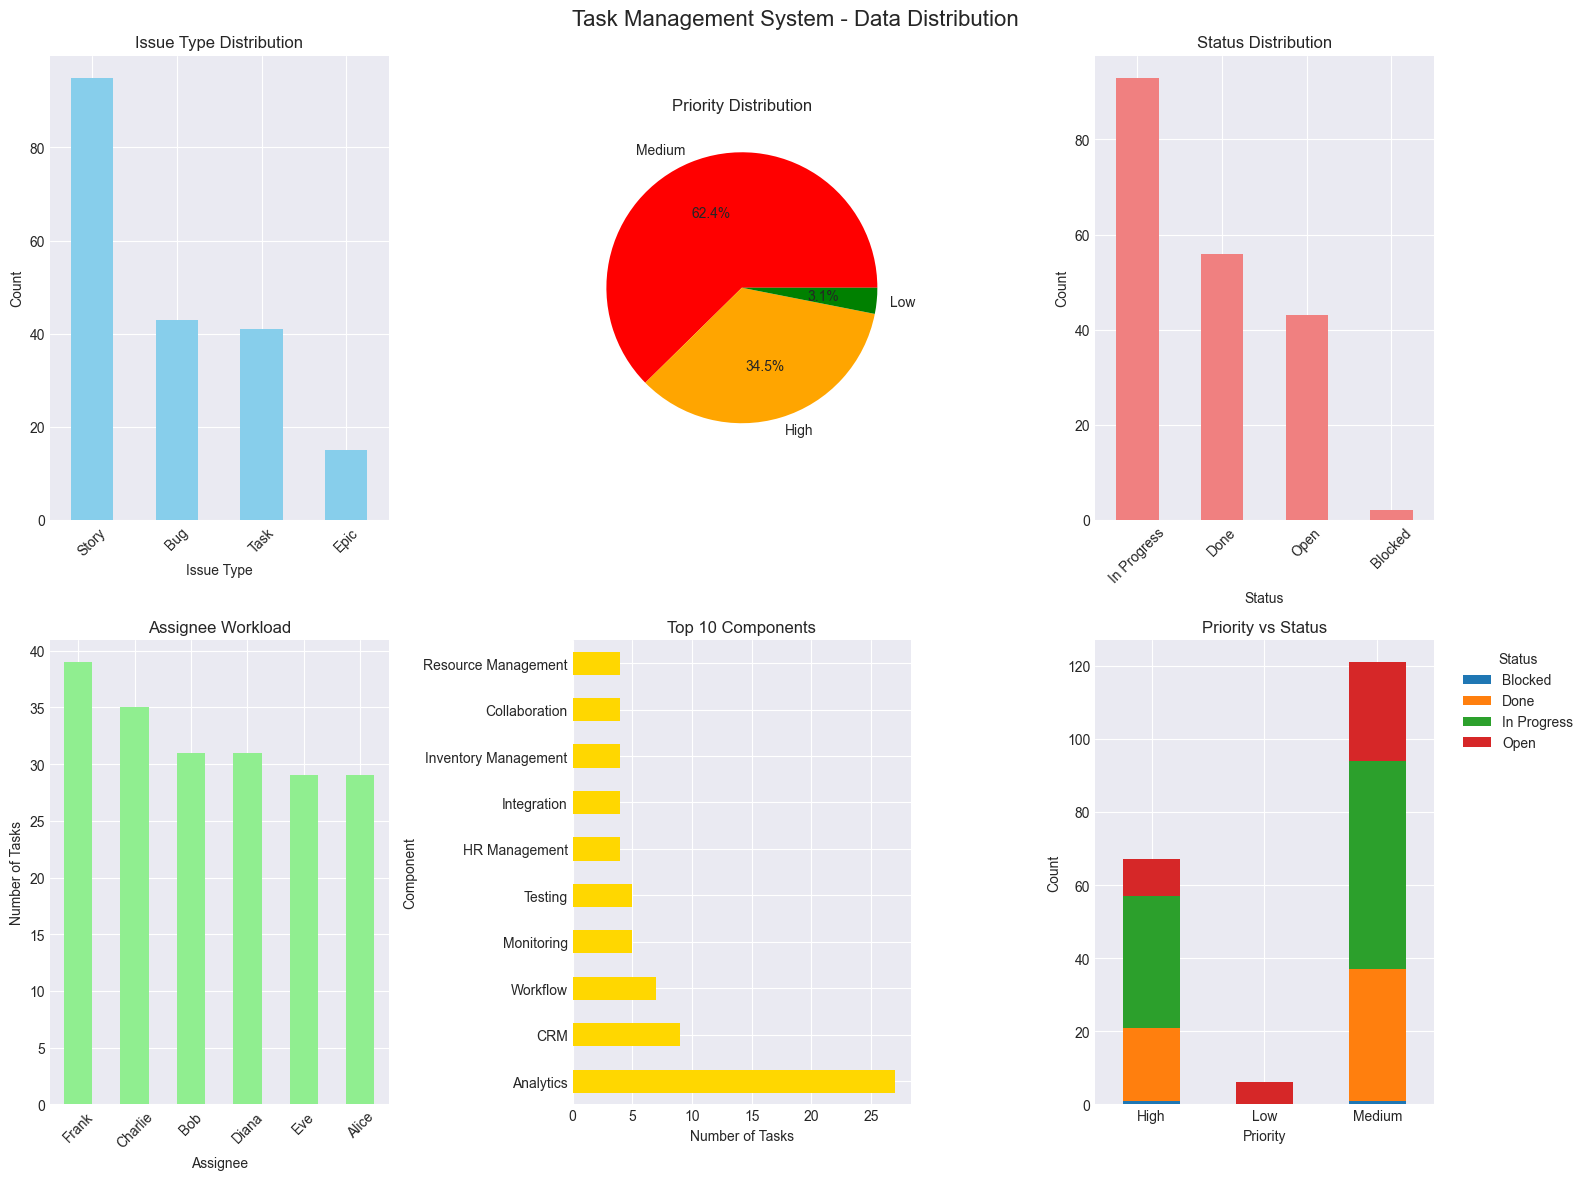

In [10]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle('Task Management System - Data Distribution', fontsize=16)

# Issue Type Distribution
df['Issue Type'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Issue Type Distribution')
axes[0,0].set_xlabel('Issue Type')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Priority Distribution
df['Priority'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', colors=['red', 'orange', 'green'])
axes[0,1].set_title('Priority Distribution')
axes[0,1].set_ylabel('')

# Status Distribution
df['Status'].value_counts().plot(kind='bar', ax=axes[0,2], color='lightcoral')
axes[0,2].set_title('Status Distribution')
axes[0,2].set_xlabel('Status')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=45)

# Assignee Workload
df['Assignee'].value_counts().plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Assignee Workload')
axes[1,0].set_xlabel('Assignee')
axes[1,0].set_ylabel('Number of Tasks')
axes[1,0].tick_params(axis='x', rotation=45)

# Top 10 Components
top_components = df['Component'].value_counts().head(10)
top_components.plot(kind='barh', ax=axes[1,1], color='gold')
axes[1,1].set_title('Top 10 Components')
axes[1,1].set_xlabel('Number of Tasks')

# Priority vs Status Cross-tabulation
priority_status = pd.crosstab(df['Priority'], df['Status'])
priority_status.plot(kind='bar', ax=axes[1,2], stacked=True)
axes[1,2].set_title('Priority vs Status')
axes[1,2].set_xlabel('Priority')
axes[1,2].set_ylabel('Count')
axes[1,2].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# DATA ANALYSIS

In [11]:
# Convert date to datetime
df['Created'] = pd.to_datetime(df['Created'], format='%d-%m-%Y')
df['Due Date'] = pd.to_datetime(df['Due Date'], format='%d-%m-%Y')

In [12]:
# Calculate days to complete
df['Days to Complete'] = (df['Due Date'] - df['Created']).dt.days

In [13]:
df['Days to Complete'].head()

0    14
1    11
2     8
3    15
4    12
Name: Days to Complete, dtype: int64

In [14]:
# Adding date features
df['Created_Month'] = df['Created'].dt.month
df['Created_Day_of_Week'] = df['Created'].dt.dayofweek
df['Due_Month'] = df['Due Date'].dt.month

# These columns are useful for analyzing task creation and due date patterns based on the month and day of the week.

In [15]:
print(f"Average days to complete: {df['Days to Complete'].mean():.2f}")
print(f"Median days to complete: {df['Days to Complete'].median():.2f}")
print(f"Minimum days to complete: {df['Days to Complete'].min()}")
print(f"Maximum days to complete: {df['Days to Complete'].max()}")

Average days to complete: 10.27
Median days to complete: 11.00
Minimum days to complete: 3
Maximum days to complete: 15


# DATA CLEANING

In [16]:
# Creating a copy for cleaning
df_clean = df.copy()

In [17]:
# Removing any whitespaces, trailings etc using strip function
text_columns = ['Summary', 'Description', 'Assignee', 'Reporter', 'Component']
for col in text_columns:
  df_clean[col] = df_clean[col].str.strip()

In [18]:
# Standardize text casinf for consistency
df_clean['Issue Type'] = df_clean['Issue Type'].str.title()
df_clean['Status'] = df_clean['Status'].str.title()
df_clean['Priority'] = df_clean['Priority'].str.title()

In [19]:
# Print the cleaned dataset shape
df_clean.shape

(194, 15)

In [20]:
df_clean.head()

,Issue Key,Summary,Description,Assignee,Reporter,Issue Type,Priority,Status,Component,Created,Due Date,Days to Complete,Created_Month,Created_Day_of_Week,Due_Month
0,SWP-1,User Authentication Failure,Users unable to log in due to OAuth 2.0 token ...,Bob,Heidi,Bug,High,In Progress,Authentication,2025-06-11,2025-06-25,14,6,2,6
1,SWP-2,Payment Gateway Transaction Error,Stripe payments intermittently fail with 500 e...,Eve,Grace,Bug,High,Open,Payment Processing,2025-07-05,2025-07-16,11,7,5,7
2,SWP-3,Database Migration Tool,Create automated database migration scripts to...,Bob,Judy,Task,High,Done,Database,2025-06-02,2025-06-10,8,6,0,6
3,SWP-4,Push Notification Delivery Issue,Push notifications not delivered to iOS device...,Eve,Ivan,Bug,Medium,In Progress,Notifications,2025-06-23,2025-07-08,15,6,0,7
4,SWP-5,API Rate Limiting Implementation,Build robust API rate limiting system with Red...,Frank,Ivan,Task,High,In Progress,API,2025-06-04,2025-06-16,12,6,2,6


In [21]:
df_clean.columns

Index(['Issue Key', 'Summary', 'Description', 'Assignee', 'Reporter',
       'Issue Type', 'Priority', 'Status', 'Component', 'Created', 'Due Date',
       'Days to Complete', 'Created_Month', 'Created_Day_of_Week',
       'Due_Month'],
      dtype='object')

# NLP PREPROCESSING

In [22]:
# Initializie NLP tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Using customized stopwords for more Robust NLP process

In [23]:
# Basic task management terms
task_management_stopwords = {
    'task', 'tasks', 'issue', 'issues', 'ticket', 'tickets', 'story', 'stories',
    'epic', 'epics', 'bug', 'bugs', 'defect', 'defects', 'item', 'items',
    'request', 'requests', 'requirement', 'requirements', 'feature', 'features'
}

In [24]:
# Software development terms
software_dev_stopwords = {
    'system', 'systems', 'application', 'applications', 'app', 'apps',
    'software', 'program', 'programs', 'code', 'coding', 'development',
    'develop', 'developer', 'developers', 'dev', 'implementation',
    'implement', 'implementing', 'build', 'building', 'create', 'creating',
    'design', 'designing', 'solution', 'solutions', 'project', 'projects'
}

In [25]:
# User-related terms
user_stopwords = {
    'user', 'users', 'customer', 'customers', 'client', 'clients',
    'end-user', 'enduser', 'admin', 'administrator', 'administrators',
    'operator', 'operators', 'stakeholder', 'stakeholders'
}

In [26]:
# Action words (common in task descriptions)
action_stopwords = {
    'need', 'needs', 'needed', 'require', 'required', 'requires', 'requiring',
    'want', 'wants', 'wanted', 'should', 'must', 'have', 'has', 'had',
    'will', 'would', 'could', 'can', 'cannot', 'able', 'unable',
    'make', 'makes', 'made', 'making', 'do', 'does', 'did', 'doing',
    'get', 'gets', 'got', 'getting', 'take', 'takes', 'took', 'taking',
    'give', 'gives', 'gave', 'giving', 'put', 'puts', 'putting',
    'add', 'adds', 'added', 'adding', 'remove', 'removes', 'removed', 'removing',
    'update', 'updates', 'updated', 'updating', 'change', 'changes', 'changed', 'changing',
    'fix', 'fixes', 'fixed', 'fixing', 'solve', 'solves', 'solved', 'solving',
    'resolve', 'resolves', 'resolved', 'resolving', 'handle', 'handles', 'handled', 'handling'
}

In [27]:
# Technical process terms
process_stopwords = {
    'process', 'processes', 'processing', 'procedure', 'procedures',
    'method', 'methods', 'methodology', 'approach', 'approaches',
    'way', 'ways', 'step', 'steps', 'phase', 'phases',
    'workflow', 'workflows', 'pipeline', 'pipelines'
}

In [28]:
# Quality testing terms
quality_stopwords = {
    'test', 'tests', 'testing', 'tested', 'tester', 'testers',
    'quality', 'qa', 'qc', 'validation', 'verify', 'verification',
    'check', 'checks', 'checked', 'checking', 'review', 'reviews',
    'reviewed', 'reviewing', 'approve', 'approved', 'approval'
}


In [29]:
# Data and technical terms
data_tech_stopwords = {
    'data', 'database', 'db', 'table', 'tables', 'field', 'fields',
    'column', 'columns', 'row', 'rows', 'record', 'records',
    'file', 'files', 'document', 'documents', 'report', 'reports',
    'configuration', 'config', 'settings', 'setting', 'parameter', 'parameters',
    'variable', 'variables', 'value', 'values', 'property', 'properties'
}

In [30]:
# Platform and environment terms
platform_stopwords = {
    'platform', 'platforms', 'environment', 'environments', 'server', 'servers',
    'client', 'clients', 'web', 'website', 'site', 'page', 'pages',
    'interface', 'interfaces', 'ui', 'ux', 'gui', 'api', 'apis',
    'service', 'services', 'component', 'components', 'module', 'modules',
    'library', 'libraries', 'framework', 'frameworks', 'tool', 'tools'
}

In [31]:
# Business and management terms
business_stopwords = {
    'business', 'company', 'organization', 'team', 'teams', 'department',
    'departments', 'management', 'manager', 'managers', 'lead', 'leads',
    'owner', 'owners', 'stakeholder', 'stakeholders', 'vendor', 'vendors',
    'client', 'clients', 'customer', 'customers'
}

In [32]:
# Time and priority terms
time_priority_stopwords = {
    'time', 'times', 'timing', 'schedule', 'scheduled', 'scheduling',
    'deadline', 'deadlines', 'due', 'urgent', 'priority', 'priorities',
    'important', 'critical', 'asap', 'immediately', 'quick', 'quickly',
    'fast', 'slow', 'early', 'late', 'delay', 'delayed'
}

In [33]:
# Generic filler words
filler_stopwords = {
    'thing', 'things', 'stuff', 'something', 'anything', 'everything',
    'nothing', 'someone', 'anyone', 'everyone', 'somewhere', 'anywhere',
    'everywhere', 'somehow', 'anyhow', 'anyway', 'etc', 'ect'
}

In [34]:
# Communication terms
communication_stopwords = {
    'email', 'emails', 'message', 'messages', 'notification', 'notifications',
    'alert', 'alerts', 'reminder', 'reminders', 'communication', 'communicate',
    'contact', 'contacts', 'call', 'calls', 'meeting', 'meetings',
    'discussion', 'discussions', 'feedback', 'comment', 'comments'
}

In [35]:
# Status and state terms
status_stopwords = {
    'status', 'state', 'states', 'condition', 'conditions', 'situation',
    'situations', 'case', 'cases', 'scenario', 'scenarios', 'example',
    'examples', 'instance', 'instances', 'occurrence', 'occurrences'
}

In [36]:
# Combine all custom stopword sets
all_custom_stopwords = (
    task_management_stopwords | software_dev_stopwords | user_stopwords |
    action_stopwords | process_stopwords | quality_stopwords |
    data_tech_stopwords | platform_stopwords | business_stopwords |
    time_priority_stopwords | filler_stopwords | communication_stopwords |
    status_stopwords
)

In [37]:
# Add domain-specific abbreviations and acronyms
abbreviations_stopwords = {
    'api', 'ui', 'ux', 'db', 'sql', 'html', 'css', 'js', 'json', 'xml',
    'http', 'https', 'url', 'uri', 'rest', 'soap', 'crud', 'mvc',
    'ci', 'cd', 'devops', 'qa', 'qc', 'sla', 'kpi', 'roi', 'mvp',
    'poc', 'crm', 'erp', 'cms', 'lms', 'aws', 'gcp', 'azure',
    'ios', 'android', 'mac', 'pc', 'linux', 'windows', 'docker',
    'kubernetes', 'git', 'github', 'gitlab', 'jenkins', 'jira'
}

In [38]:
# Add technical file extensions and formats
file_format_stopwords = {
    'pdf', 'doc', 'docx', 'xls', 'xlsx', 'ppt', 'pptx', 'txt', 'csv',
    'jpg', 'jpeg', 'png', 'gif', 'svg', 'mp4', 'avi', 'mp3', 'wav',
    'zip', 'rar', 'tar', 'gz', 'exe', 'dll', 'jar', 'war'
}

In [39]:
# Combine with abbreviations and file formats
all_custom_stopwords = all_custom_stopwords | abbreviations_stopwords | file_format_stopwords

In [40]:
def create_enhanced_stopwords():
    from nltk.corpus import stopwords
    standard_stopwords = set(stopwords.words('english'))
    enhanced_stopwords = standard_stopwords | all_custom_stopwords
    return enhanced_stopwords

In [41]:
print("Enhanced Custom Stopwords Summary:")
print("="*50)
print(f"Task Management Terms: {len(task_management_stopwords)}")
print(f"Software Development Terms: {len(software_dev_stopwords)}")
print(f"User-related Terms: {len(user_stopwords)}")
print(f"Action Words: {len(action_stopwords)}")
print(f"Process Terms: {len(process_stopwords)}")
print(f"Quality/Testing Terms: {len(quality_stopwords)}")
print(f"Data/Technical Terms: {len(data_tech_stopwords)}")
print(f"Platform/Environment Terms: {len(platform_stopwords)}")
print(f"Business/Management Terms: {len(business_stopwords)}")
print(f"Time/Priority Terms: {len(time_priority_stopwords)}")
print(f"Filler Words: {len(filler_stopwords)}")
print(f"Communication Terms: {len(communication_stopwords)}")
print(f"Status/State Terms: {len(status_stopwords)}")
print(f"Abbreviations: {len(abbreviations_stopwords)}")
print(f"File Formats: {len(file_format_stopwords)}")
print("="*50)
print(f"Total Custom Stopwords: {len(all_custom_stopwords)}")

Enhanced Custom Stopwords Summary:
Task Management Terms: 22
Software Development Terms: 29
User-related Terms: 15
Action Words: 77
Process Terms: 20
Quality/Testing Terms: 23
Data/Technical Terms: 31
Platform/Environment Terms: 32
Business/Management Terms: 22
Time/Priority Terms: 24
Filler Words: 18
Communication Terms: 23
Status/State Terms: 17
Abbreviations: 48
File Formats: 26
Total Custom Stopwords: 413


In [42]:
stop_words = create_enhanced_stopwords()

In [43]:
def clean_text(text):
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [44]:
def tokenize_text(text):
    if not text:
        return []

    tokens = word_tokenize(text)
    return tokens

In [45]:
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [46]:
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [47]:
def lemmatize_tokens(tokens):
    # Get POS tags for better lemmatization
    pos_tags = pos_tag(tokens)

    def get_wordnet_pos(treebank_tag):
        """Convert treebank POS tag to WordNet POS tag"""
        if treebank_tag.startswith('J'):
            return 'a'  # adjective
        elif treebank_tag.startswith('V'):
            return 'v'  # verb
        elif treebank_tag.startswith('N'):
            return 'n'  # noun
        elif treebank_tag.startswith('R'):
            return 'r'  # adverb
        else:
            return 'n'  # default to noun

    lemmatized_tokens = []
    for token, pos in pos_tags:
        wordnet_pos = get_wordnet_pos(pos)
        lemmatized_token = lemmatizer.lemmatize(token, pos=wordnet_pos)
        lemmatized_tokens.append(lemmatized_token)

    return lemmatized_tokens

In [48]:
def preprocess_text(text):
# Step 1: Clean text
    cleaned_text = clean_text(text)

# Step 2: Tokenize
    tokens = tokenize_text(cleaned_text)

# Step 3: Remove stopwords
    filtered_tokens = remove_stopwords(tokens)

# Step 4: Stemming
    stemmed_tokens = stem_tokens(filtered_tokens)

# Step 5: Lemmatization
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)

    return {
        'cleaned_text': cleaned_text,
        'tokens': tokens,
        'filtered_tokens': filtered_tokens,
        'stemmed_tokens': stemmed_tokens,
        'lemmatized_tokens': lemmatized_tokens,
        'processed_text_stem': ' '.join(stemmed_tokens),
        'processed_text_lemma': ' '.join(lemmatized_tokens)
    }

In [49]:
# Process Summary column
print("Processing Summary column...")
df_clean['summary_processed'] = df_clean['Summary'].apply(lambda x: preprocess_text(x))

Processing Summary column...


In [50]:
# Process Description column
print("Processing Description column...")
df_clean['description_processed'] = df_clean['Description'].apply(lambda x: preprocess_text(x))

Processing Description column...


In [51]:
# Extract processed text for further analysis
df_clean['summary_cleaned'] = df_clean['summary_processed'].apply(lambda x: x['cleaned_text'])
df_clean['summary_tokens'] = df_clean['summary_processed'].apply(lambda x: x['tokens'])
df_clean['summary_lemmatized'] = df_clean['summary_processed'].apply(lambda x: x['processed_text_lemma'])
df_clean['summary_stemmed'] = df_clean['summary_processed'].apply(lambda x: x['processed_text_stem'])

In [52]:
df_clean['description_cleaned'] = df_clean['description_processed'].apply(lambda x: x['cleaned_text'])
df_clean['description_tokens'] = df_clean['description_processed'].apply(lambda x: x['tokens'])
df_clean['description_lemmatized'] = df_clean['description_processed'].apply(lambda x: x['processed_text_lemma'])
df_clean['description_stemmed'] = df_clean['description_processed'].apply(lambda x: x['processed_text_stem'])

In [53]:
# Combine summary and description for comprehensive text analysis
df_clean['combined_text'] = df_clean['summary_cleaned'] + ' ' + df_clean['description_cleaned']
df_clean['combined_lemmatized'] = df_clean['summary_lemmatized'] + ' ' + df_clean['description_lemmatized']

# TEXT ANALYSIS RESULTS

In [54]:
sample_idx = 0
original_summary = df_clean.iloc[sample_idx]['Summary']
original_description = df_clean.iloc[sample_idx]['Description']

In [55]:
print(f"Original Summary: {original_summary}")
print(f"Cleaned Summary: {df_clean.iloc[sample_idx]['summary_cleaned']}")
print(f"Tokens: {df_clean.iloc[sample_idx]['summary_tokens']}")
print(f"Lemmatized: {df_clean.iloc[sample_idx]['summary_lemmatized']}")
print(f"Stemmed: {df_clean.iloc[sample_idx]['summary_stemmed']}")

Original Summary: User Authentication Failure
Cleaned Summary: user authentication failure
Tokens: ['user', 'authentication', 'failure']
Lemmatized: authentication failure
Stemmed: authent failur


In [56]:
print(f"\nOriginal Description: {original_description}")
print(f"Cleaned Description: {df_clean.iloc[sample_idx]['description_cleaned']}")
print(f"Lemmatized: {df_clean.iloc[sample_idx]['description_lemmatized']}")


Original Description: Users unable to log in due to OAuth 2.0 token refresh failure, causing session timeouts.
Cleaned Description: users unable to log in due to oauth token refresh failure causing session timeouts
Lemmatized: log oauth token refresh failure cause session timeouts


In [57]:
# Text statistics
df_clean['summary_word_count'] = df_clean['summary_tokens'].apply(len)
df_clean['description_word_count'] = df_clean['description_tokens'].apply(len)
df_clean['combined_word_count'] = df_clean['summary_word_count'] + df_clean['description_word_count']

print(f"Average words in summary: {df_clean['summary_word_count'].mean():.2f}")
print(f"Average words in description: {df_clean['description_word_count'].mean():.2f}")
print(f"Average total words: {df_clean['combined_word_count'].mean():.2f}")

Average words in summary: 2.89
Average words in description: 11.91
Average total words: 14.80


In [58]:
# Most common words analysis

from collections import Counter

all_tokens = []
for tokens in df_clean['summary_tokens']:
    all_tokens.extend(tokens)
for tokens in df_clean['description_tokens']:
    all_tokens.extend(tokens)

In [59]:
# Remove stopwords for word frequency analysis
filtered_tokens = [token for token in all_tokens if token.lower() not in stop_words and len(token) > 2]
word_freq = Counter(filtered_tokens)

In [60]:
print(f"\nTop 30 most common words:")
for word, freq in word_freq.most_common(30):
    print(f"{word}: {freq}")


Top 30 most common words:
tracking: 77
analysis: 34
monitoring: 33
optimization: 30
performance: 23
analytics: 22
capabilities: 20
reporting: 18
planning: 18
failure: 14
error: 13
integration: 13
automation: 13
content: 12
collection: 12
compliance: 12
digital: 12
resource: 12
identification: 12
automated: 11
intelligence: 11
fails: 11
improvement: 11
access: 10
risk: 10
metrics: 10
sync: 9
assessment: 9
response: 8
strategy: 8


# SAVING THE FINAL DATA

In [61]:
# Selecting relevant columns
columns_to_keep = [
    'Issue Key', 'Summary', 'Description', 'Assignee', 'Reporter',
    'Issue Type', 'Priority', 'Status', 'Component', 'Created', 'Due Date',
    'Days to Complete', 'Created_Month', 'Created_Day_of_Week', 'Due_Month',
    'summary_cleaned', 'description_cleaned', 'combined_text',
    'summary_lemmatized', 'description_lemmatized', 'combined_lemmatized',
    'summary_word_count', 'description_word_count', 'combined_word_count'
]

df_final = df_clean[columns_to_keep].copy()

In [66]:
# Save the processed dataset
df_final.to_csv('Task_management_processed.csv', index=False)

In [67]:
print(f"Final dataset shape: {df_final.shape}")

Final dataset shape: (194, 24)


In [64]:
print('Columns in final dataset: ')
for i, col in enumerate(df_final.columns):
    print(f"{i+1}. {col}")

Columns in final dataset: 
1. Issue Key
2. Summary
3. Description
4. Assignee
5. Reporter
6. Issue Type
7. Priority
8. Status
9. Component
10. Created
11. Due Date
12. Days to Complete
13. Created_Month
14. Created_Day_of_Week
15. Due_Month
16. summary_cleaned
17. description_cleaned
18. combined_text
19. summary_lemmatized
20. description_lemmatized
21. combined_lemmatized
22. summary_word_count
23. description_word_count
24. combined_word_count
